<a href="https://www.kaggle.com/code/funxexcel/completed-p5-dt-post-pruning?scriptVersionId=108305169" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Part 1 : Decision Trees - Post Pruning
- Why? Decision Trees are know to overfit (hence, hyperparameter optimization to reduce overfitting)

## Import Libraries

In [1]:
import numpy as np 
import pandas as pd 

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report

from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

## Import Data

In [2]:
data = pd.read_csv('/kaggle/input/credit-card-approval-clean-data/clean_dataset.csv')

## Partition Data into X and y

In [3]:
y = data['Approved']
X = data.drop('Approved', axis = 1)

## Create Dummy Variables

In [4]:
X = pd.get_dummies(X)

## Train Test Split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

## Decision Tree with Hyperparameter

### 1/ Initiate an Instance

In [6]:
dt_model = DecisionTreeClassifier(random_state = 42)

### 2/ Fit Model without any Hyperparameters

In [7]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

### 3/ Plot Tree

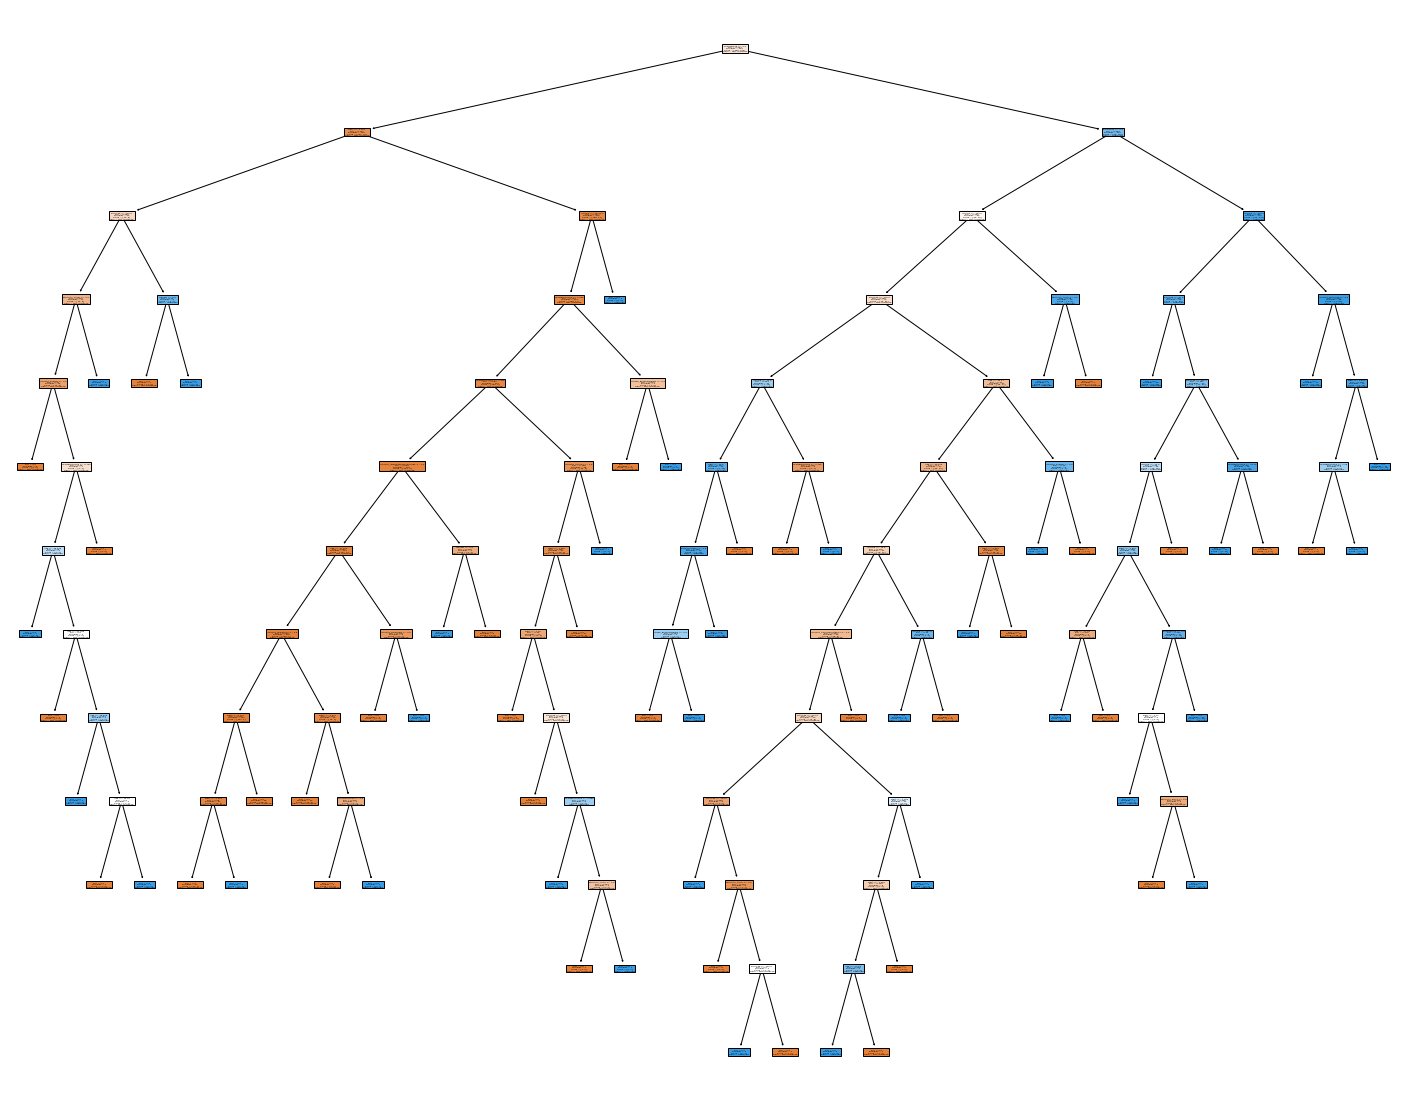

In [8]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(dt_model, 
                   feature_names = X.columns,  
                   class_names = ['Not Approved','Approved'],
                   filled=True)

### 4/ Find ccp_alphas path

In [9]:
ccp_alphas = dt_model.cost_complexity_pruning_path(X_train, y_train)['ccp_alphas']
ccp_alphas

array([0.        , 0.0012987 , 0.0014266 , 0.00170651, 0.00189394,
       0.00200989, 0.00207887, 0.00222635, 0.002886  , 0.00290484,
       0.00294613, 0.00296846, 0.00324675, 0.00324675, 0.00324675,
       0.0034632 , 0.0034632 , 0.0034632 , 0.00348382, 0.00349882,
       0.0036075 , 0.00389566, 0.0038961 , 0.00405844, 0.0040885 ,
       0.00420168, 0.0043999 , 0.00458481, 0.00461094, 0.00481349,
       0.00526408, 0.00535953, 0.00828278, 0.00860292, 0.01045598,
       0.04584476, 0.22830233])

### 5/ Find best ccp_alpha

In [10]:
# Keep all Params Same and only change cc_alpha
dt_param_grid = {
    'ccp_alpha'  : ccp_alphas
}

In [11]:
# Re Do Grid Search to get best cc_alpha
gs_cc_dt = GridSearchCV(dt_model, param_grid = dt_param_grid, scoring = 'accuracy')

In [12]:
# Fit
gs_cc_dt.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'ccp_alpha': array([0.        , 0.0012987 , 0.0014266 , 0.00170651, 0.00189394,
       0.00200989, 0.00207887, 0.00222635, 0.002886  , 0.00290484,
       0.00294613, 0.00296846, 0.00324675, 0.00324675, 0.00324675,
       0.0034632 , 0.0034632 , 0.0034632 , 0.00348382, 0.00349882,
       0.0036075 , 0.00389566, 0.0038961 , 0.00405844, 0.0040885 ,
       0.00420168, 0.0043999 , 0.00458481, 0.00461094, 0.00481349,
       0.00526408, 0.00535953, 0.00828278, 0.00860292, 0.01045598,
       0.04584476, 0.22830233])},
             scoring='accuracy')

In [13]:
# Get Best Estimators
best_dt_cc = gs_cc_dt.best_estimator_
gs_cc_dt.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.008282775063596978, random_state=42)

### 6/ Plot Again after Pruning

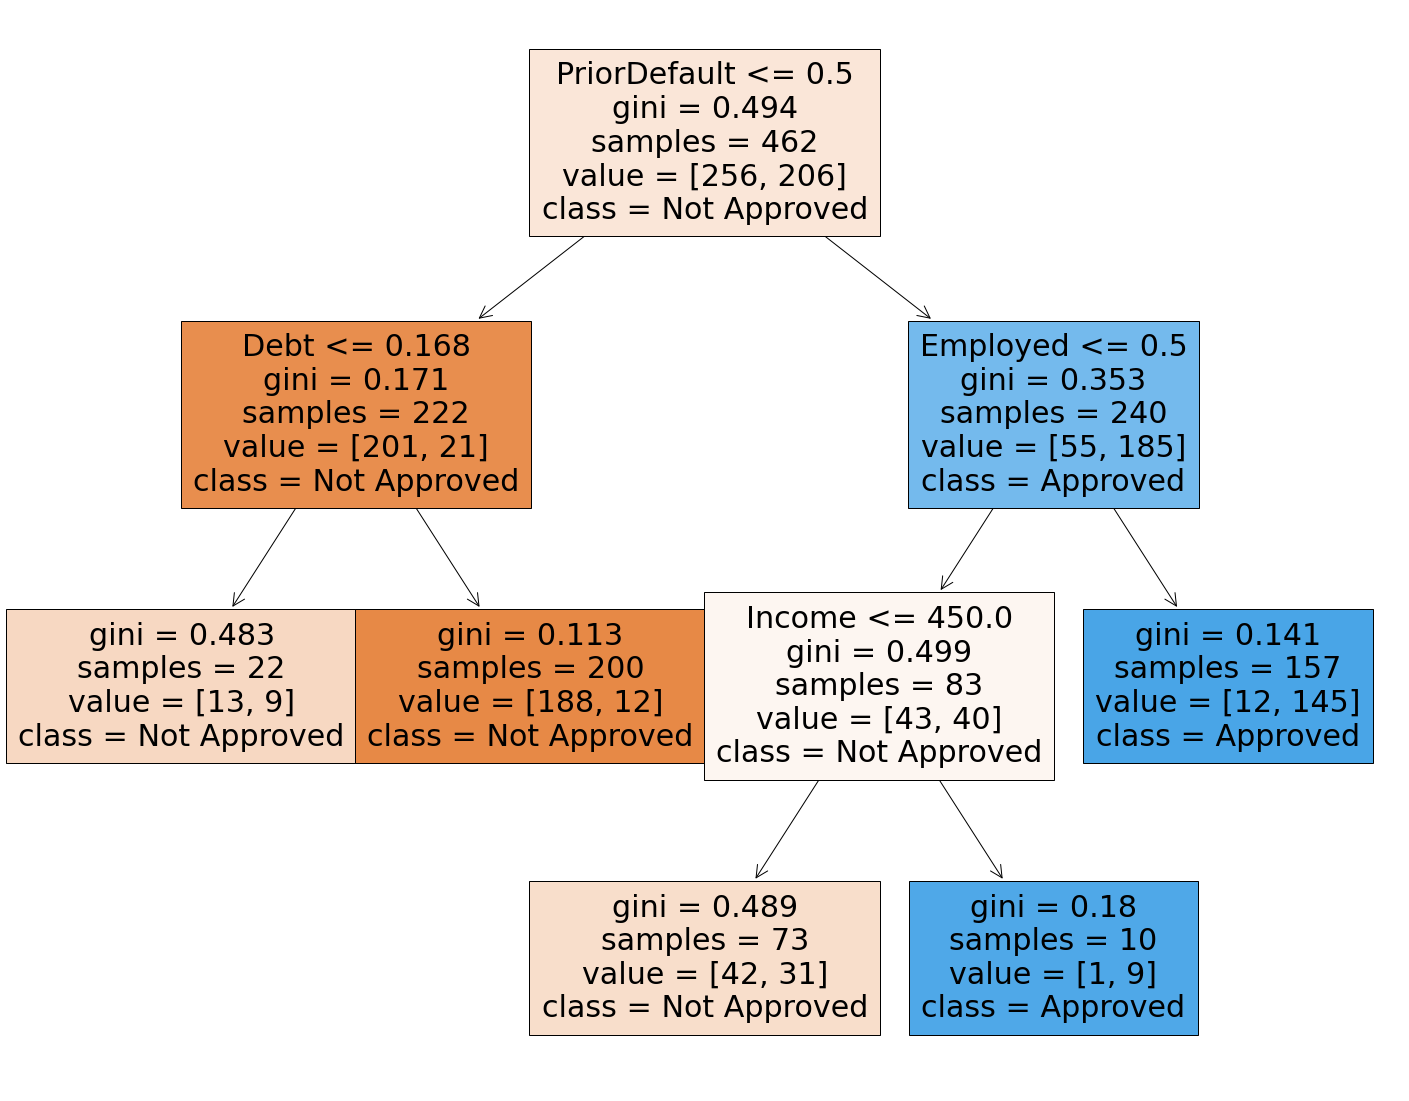

In [14]:
# Plot Post Pruned Tree
fig = plt.figure(figsize=(25,20))
_ = plot_tree(gs_cc_dt.best_estimator_, 
                   feature_names = X.columns,  
                   class_names = ['Not Approved','Approved'],
                   filled=True)

### 7/ Make predictions

In [15]:
y_train_predicted = best_dt_cc.predict(X_train)
y_test_predicted = best_dt_cc.predict(X_test)

### 8/ Check Performance

#### Check train Peformance

In [16]:
print(classification_report(y_train, y_train_predicted))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88       256
           1       0.92      0.75      0.83       206

    accuracy                           0.86       462
   macro avg       0.87      0.85      0.85       462
weighted avg       0.87      0.86      0.86       462



#### Check test peformance

In [17]:
print(classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86       127
           1       0.89      0.72      0.80       101

    accuracy                           0.84       228
   macro avg       0.85      0.83      0.83       228
weighted avg       0.84      0.84      0.83       228



# Did we improve the performance?